In [ ]:
%pylab inline

In [2]:
import distr
import common
import plots

In [3]:
import model_gaussian
model = model_gaussian

In [4]:
science_ndata = 20
science_theta_nature = 0.5

In [5]:
def collect_data(phi,ndata):
    print 'Taking Data...'
    
    theta_nature = -0.5
    return common.collect_data(phi,model.simulator, theta_nature=science_theta_nature,n_samples = ndata)

In [6]:
def calculate_posterior(prior,data,phi):
    print 'Calculate Posterior...'
    
    posterior = common.calculate_posterior(
                            prior,data,phi,
                            lnprob_args = model.details_likelihood_settings,
                            n_chainlen = 50
    )
    maximum_a_post = posterior.map(model.details_map_bins)
    
    print 'Best Theta: ', maximum_a_post
    return posterior, maximum_a_post

In [7]:
def design_next_experiment(prior):
    print 'Design Next Experiment...'
    
    eig_kwargs = {'emcee_kwargs' : {
                      'n_chainlen': 50,
                      'lnprob_args': model.details_likelihood_settings},
                  'sim_n_data': science_ndata,
                  'map_bins': model.details_map_bins}
    res_gp   = common.design_next_experiment_bayesopt(prior,model.phi_range,eig_kwargs, n_totalcalls = 7)
    res_next_phi = res_gp[0].x
    
    print 'Next Phi: ', res_next_phi
    return res_gp,res_next_phi

# Running the Science Loop

Taking Data...
Calculate Posterior...
Best Theta:  1.5
Design Next Experiment...
2017-06-08 19:05:16.239488 EIG via 4 parallel experiments with [theta,phi] 1.5 5.80217903408
2017-06-08 19:05:35.977829 EIG via 4 parallel experiments with [theta,phi] 1.5 3.28339349505
2017-06-08 19:05:58.539582 EIG via 4 parallel experiments with [theta,phi] 1.5 5.83610615979
2017-06-08 19:06:19.961118 EIG via 4 parallel experiments with [theta,phi] 1.5 4.28889596205
2017-06-08 19:06:31.855872 EIG via 4 parallel experiments with [theta,phi] 1.5 4.18637294758
2017-06-08 19:06:42.638370 EIG via 4 parallel experiments with [theta,phi] 1.5 3.28885493829
2017-06-08 19:06:52.753343 EIG via 4 parallel experiments with [theta,phi] 1.5 3.27720936888
Next Phi:  [3.2833934950543338]


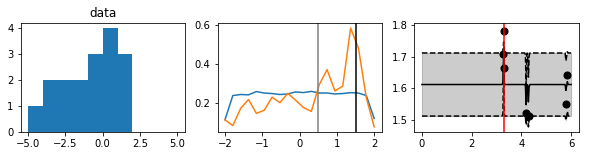

Taking Data...
Calculate Posterior...
Best Theta:  0.3
Design Next Experiment...
2017-06-08 19:07:07.682028 EIG via 4 parallel experiments with [theta,phi] 0.3 5.80217903408
2017-06-08 19:07:18.475408 EIG via 4 parallel experiments with [theta,phi] 0.3 3.28339349505
2017-06-08 19:07:29.668218 EIG via 4 parallel experiments with [theta,phi] 0.3 5.83610615979
2017-06-08 19:07:42.482684 EIG via 4 parallel experiments with [theta,phi] 0.3 4.28889596205


In [ ]:
# initial experimental settings and uninformative prior
loop_phi = 0
loop_prior = distr.Distribution('prior',range = model.theta_range)

science_history = []
n_science_iterations = 2
for i in range(n_science_iterations):
    plt.clf()

    fig,axarr = plt.subplots(1,3)
    fig.set_size_inches(10,2)
    axarr[0].set_title('data')
    
    ## 1. Perform Experiment
    loop_data = collect_data(loop_phi,science_ndata)
    plots.plot_data(loop_data,model.data_range, ax = axarr[0])

    ## 2. Calculate the Posterior
    loop_posterior, loop_best_theta = calculate_posterior(loop_prior,loop_data,loop_phi)
    plots.plot_posterior(loop_prior,loop_posterior,loop_best_theta,science_theta_nature, model.theta_range, ax = axarr[1])

    ## 3. Design Next Experiment
    loop_res_gp, loop_next_phi = design_next_experiment(loop_posterior)

    plots.plot_bayes(loop_res_gp,phi_range = model.phi_range, ax = axarr[2])
    plt.show()


    science_history.append([loop_data,loop_prior,loop_posterior,loop_best_theta,science_theta_nature,loop_res_gp])
    
    ## 5. Update our Prior and experimental settings
    loop_prior = loop_posterior
    loop_phi   = loop_next_phi